In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
cv2.__version__

'3.1.0'

# Capture and display a single frame and look at properties

In [144]:
capture = cv2.VideoCapture('test.mp4')
print(capture.get(cv2.CAP_PROP_POS_MSEC))
print(capture.get(cv2.CAP_PROP_POS_FRAMES))
print(capture.get(cv2.CAP_PROP_FPS))
print(capture.get(cv2.CAP_PROP_FRAME_COUNT))
print(capture.get(cv2.CAP_PROP_POS_AVI_RATIO))


capture.set(cv2.CAP_PROP_POS_FRAMES,1000)


print(capture.get(cv2.CAP_PROP_POS_MSEC))
print(capture.get(cv2.CAP_PROP_POS_FRAMES))
print(capture.get(cv2.CAP_PROP_FPS))
print(capture.get(cv2.CAP_PROP_FRAME_COUNT))
print(capture.get(cv2.CAP_PROP_POS_AVI_RATIO))


0.0
0.0
17.857142857142858
15674.660714285714
0.0
55999.0
999.9821428571429
17.857142857142858
15674.660714285714
0.06379609492572749


999.9821428571429
1000.2857142857143


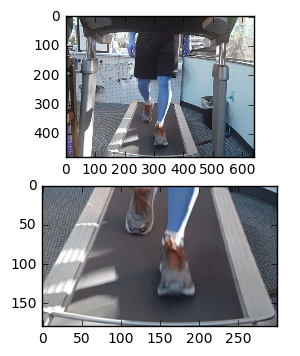

In [145]:
print(capture.get(cv2.CAP_PROP_POS_FRAMES))

b,firstFrame= capture.read()

print(capture.get(cv2.CAP_PROP_POS_FRAMES))

plt.subplot(211)
plt.imshow(firstFrame)
plt.subplot(212)
plt.imshow(firstFrame[300:480,150:450,:])


# plt.imshow(firstFrame)

capture.release()

# Loop over file (Kernel->Interupt to stop)

True

<IPython.core.display.Javascript object>


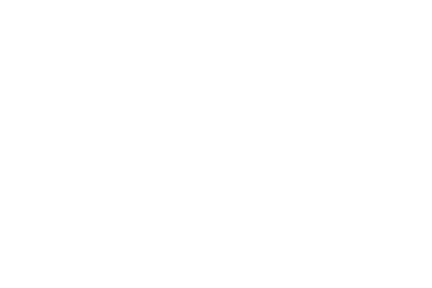

q to Quitq


<IPython.core.display.Javascript object>


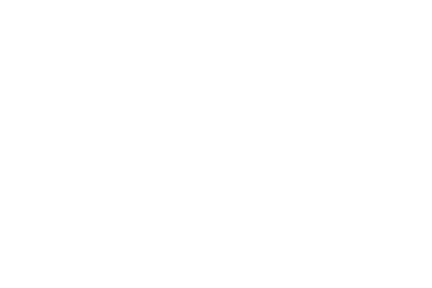

In [135]:
cap = cv2.VideoCapture('test.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES,300)

count = 0
while cap.isOpened():
    ret,frame = cap.read()
    grayCropFrame = cv2.cvtColor(frame[300:480,150:450,:], cv2.COLOR_BGR2GRAY)
#     plt.subplot(211)
#     plt.imshow(frame)
#     plt.subplot(212)
    #plt.gcf().clear()    
    plt.imshow(grayCropFrame)    
    count = count + 1
    plt.show()
    plt.gcf().clear()  
    nb = input('q to Quit')
    if nb == 'q':
        break
        
cap.release()

# Median filter for background reference - maybe not a great idea

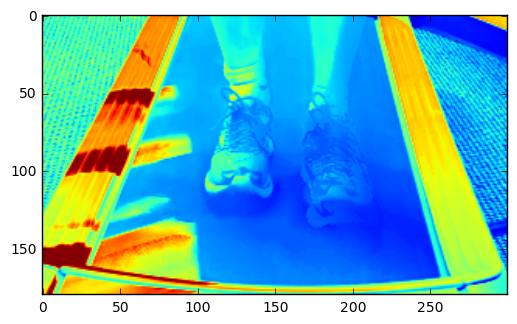

In [120]:
cap = cv2.VideoCapture('test.mp4')
endFrame = 500
count = 0

# set up buffer for output
ret,frame = cap.read()
grayCropFrame = cv2.cvtColor(frame[300:480,150:450,:], cv2.COLOR_BGR2GRAY)
frameBuffer = np.stack([grayCropFrame, grayCropFrame]) 

while cap.get(cv2.CAP_PROP_POS_FRAMES) < endFrame:
    ret,frame = cap.read()
    grayCropFrame = cv2.cvtColor(frame[300:480,150:450,:], cv2.COLOR_BGR2GRAY)
    frameBuffer = np.vstack([frameBuffer, np.resize( grayCropFrame,[1,180,300])])
    count = count + 1

bgnd = np.median(frameBuffer, 0)
plt.imshow(bgnd)
cap.release()

# One frame difference

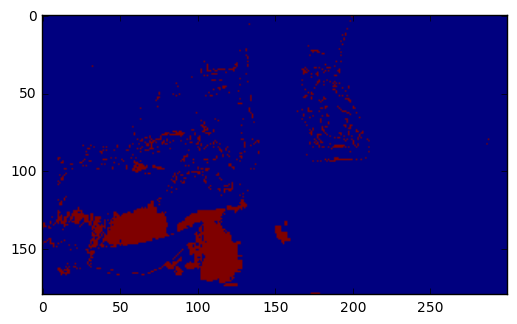

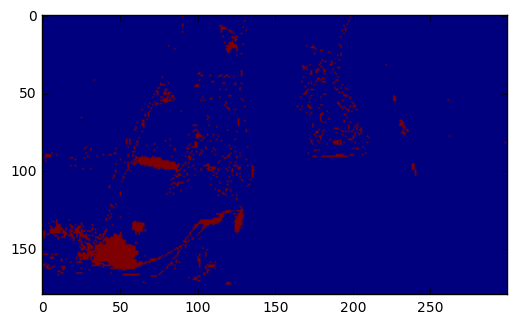

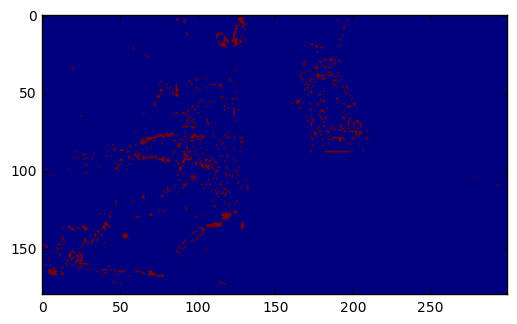

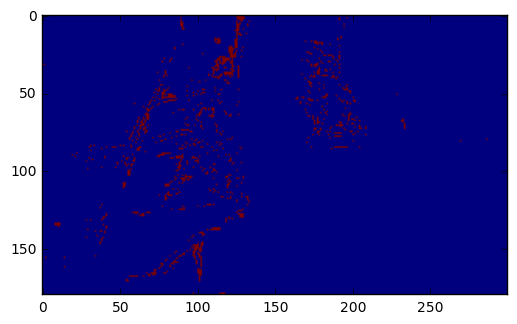

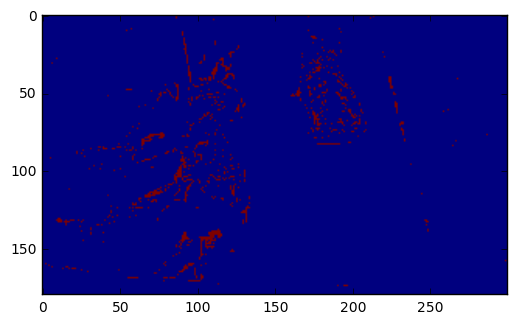

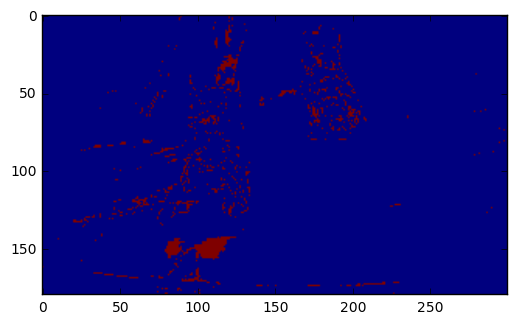

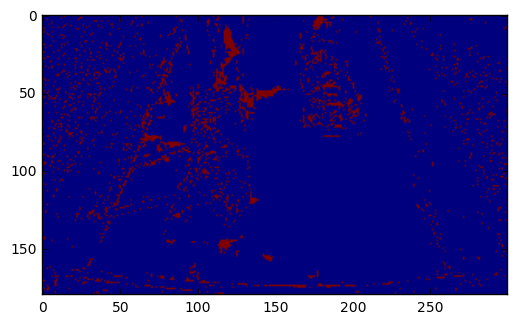

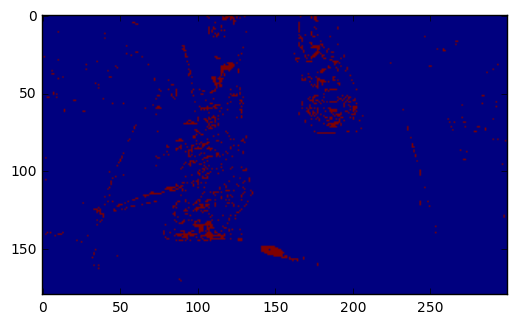

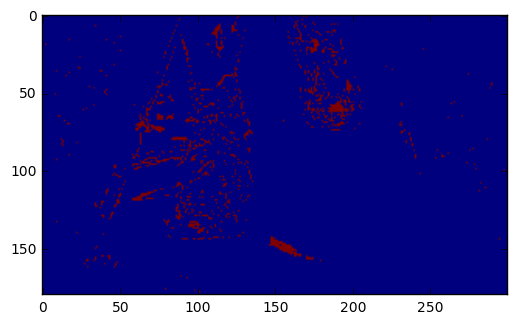

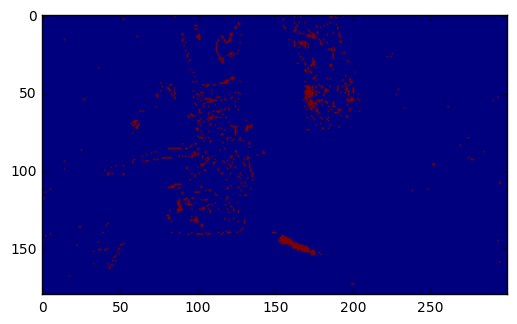

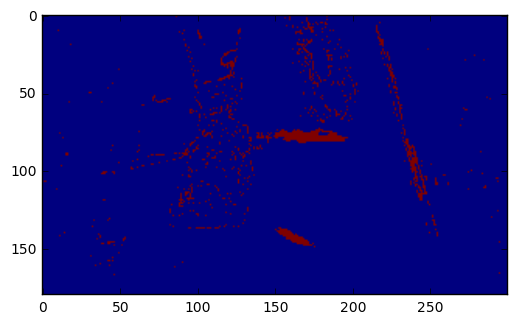

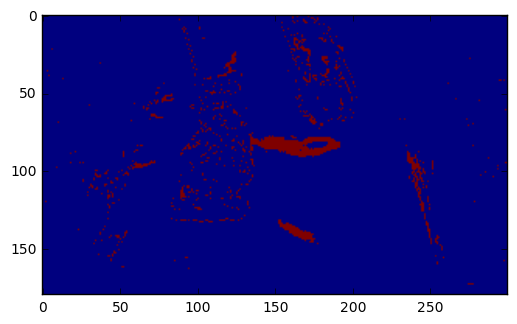

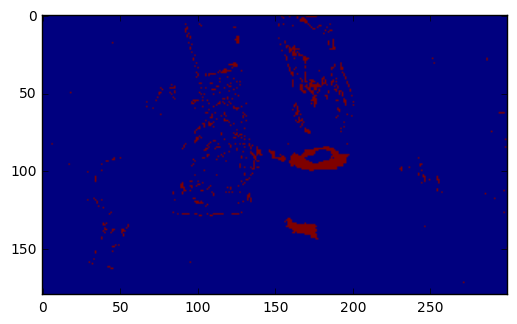

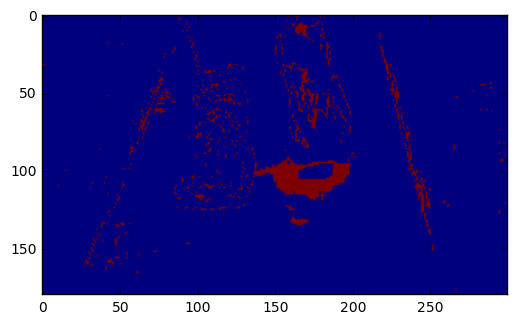

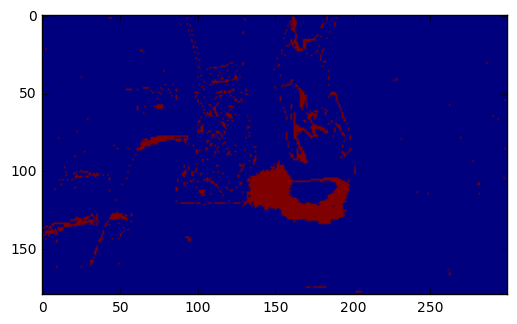

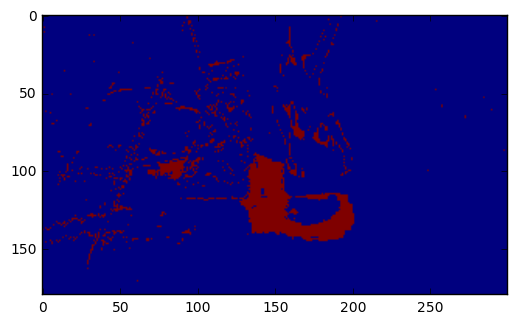

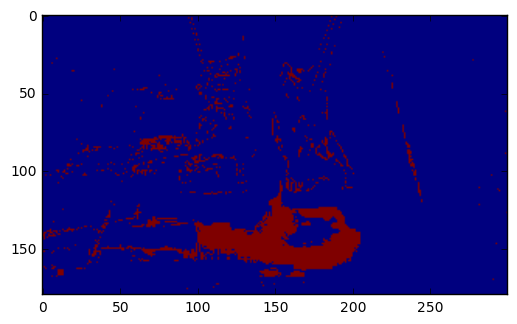

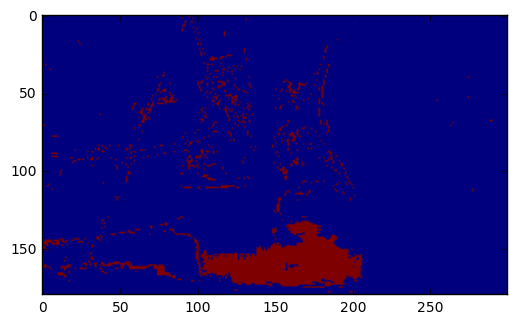

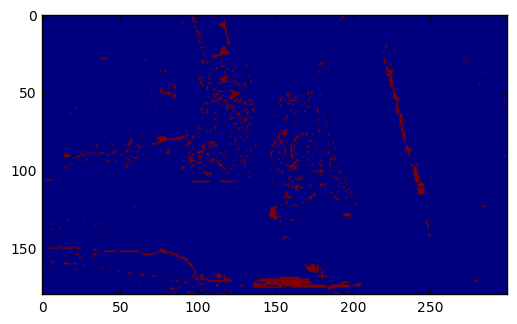

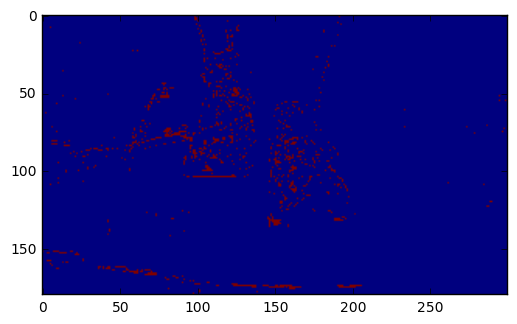

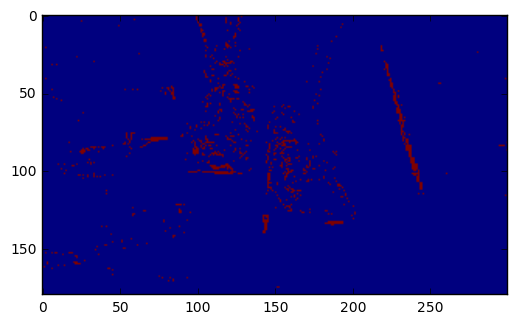

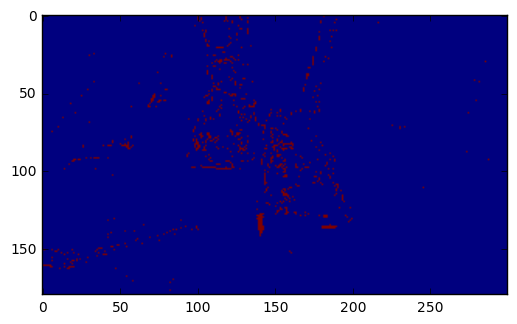

KeyboardInterrupt: 

In [117]:
def getFrame():
    return cv2.cvtColor(frame[300:480,150:450,:], cv2.COLOR_BGR2GRAY)

cap = cv2.VideoCapture('test.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES,300)

ret,frame = cap.read()
old = getFrame() 

while cap.isOpened():
    ret,frame = cap.read()
    new = getFrame()
    diff = new - old
    old = new
    plt.imshow((diff > 240) & (diff<250))
    plt.show()

cap.release()

# Multiple frame difference

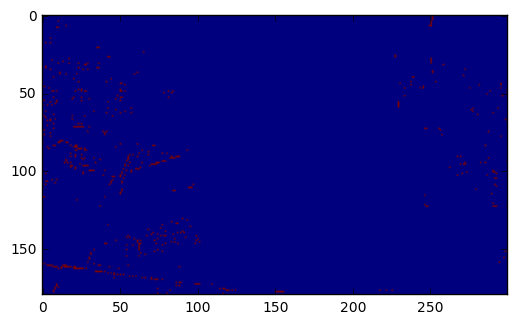

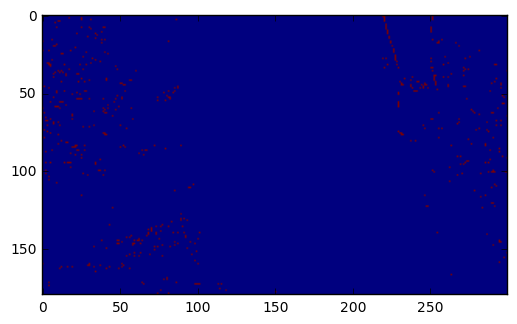

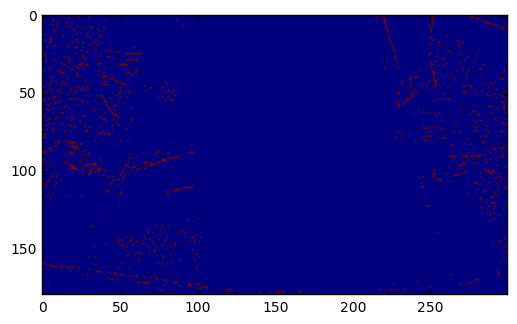

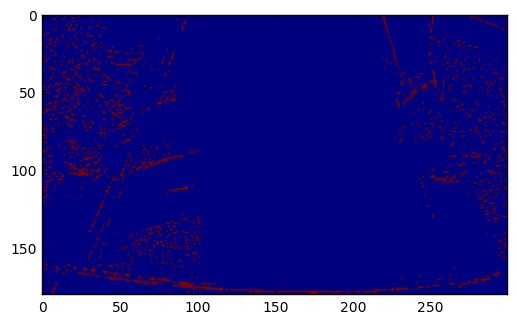

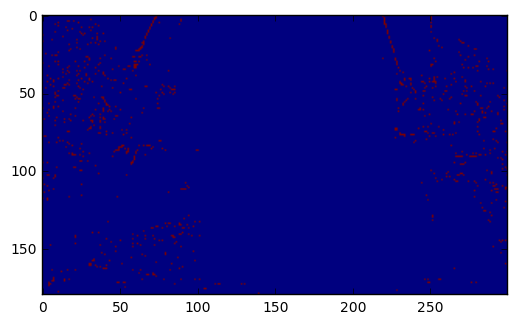

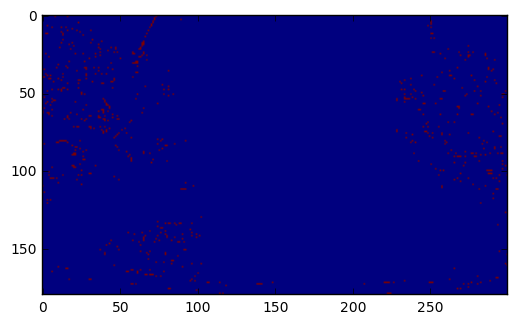

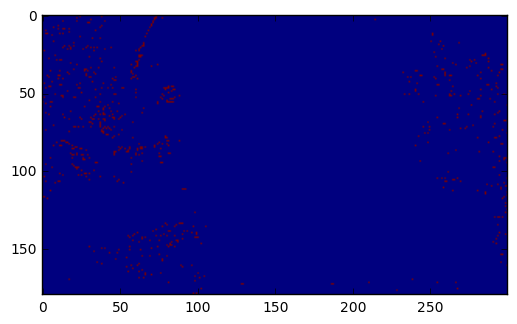

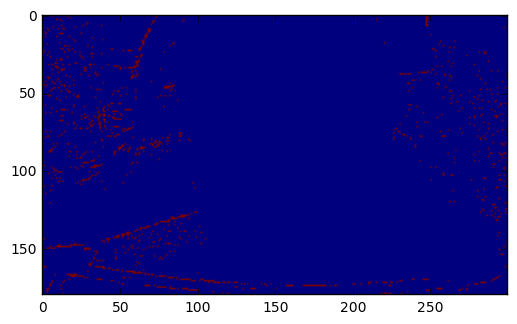

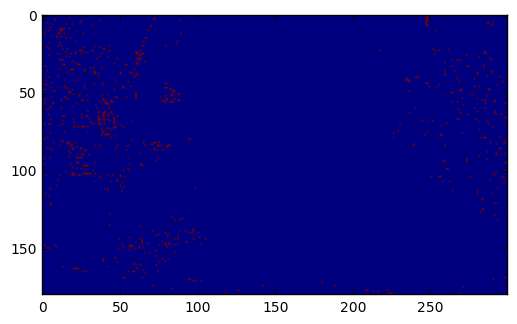

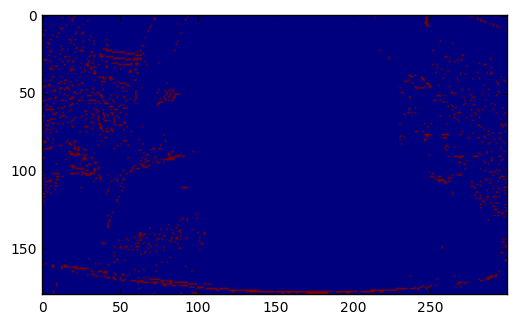

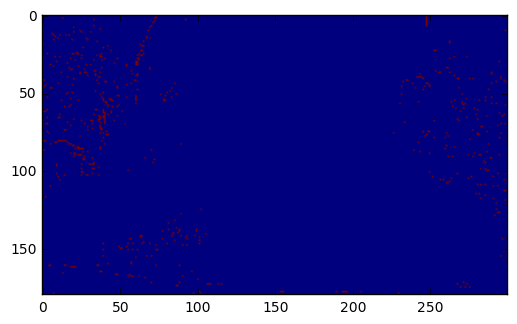

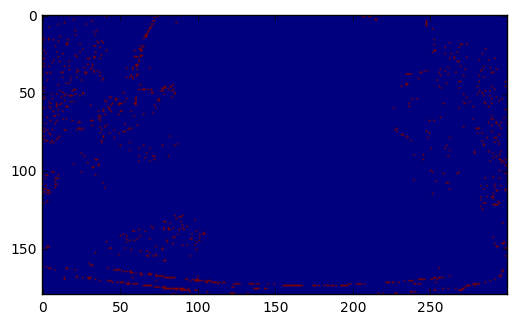

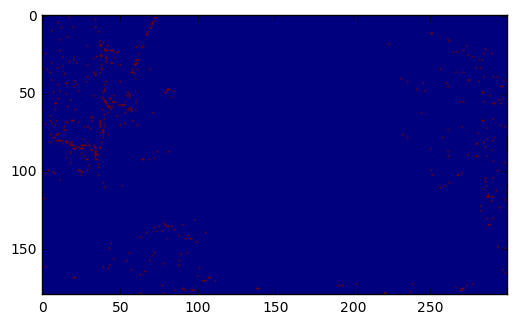

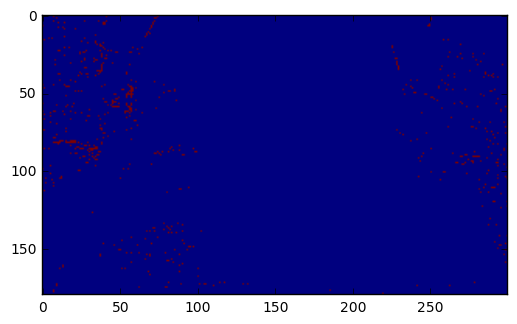

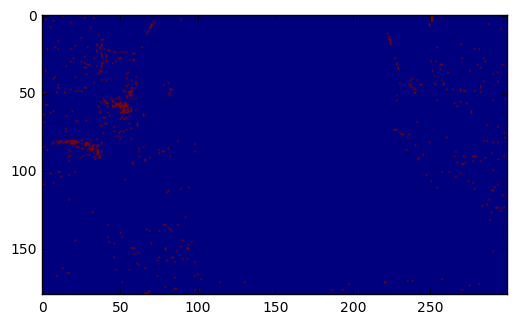

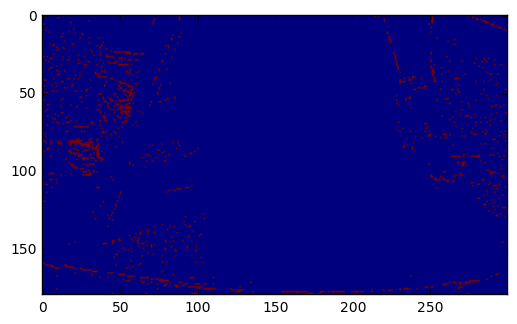

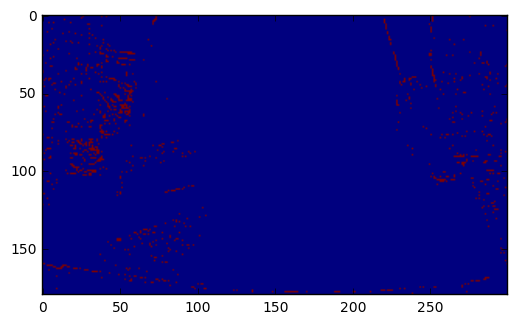

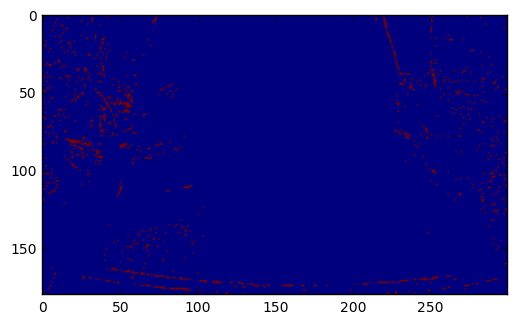

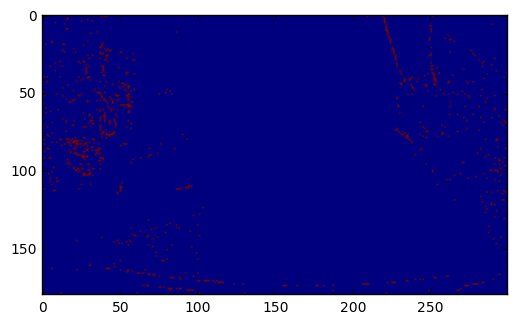

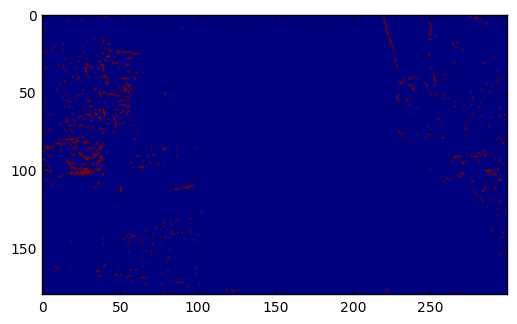

KeyboardInterrupt: 

In [102]:
def getFrame():
    return cv2.cvtColor(frame[300:480,150:450,:], cv2.COLOR_BGR2GRAY)

buffLen = 4
cap = cv2.VideoCapture('test.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES,300)

ret,frame = cap.read()
old = getFrame() 

buffer = np.tile(old, [buffLen,1,1])

while cap.isOpened():
    ret,frame = cap.read()
    new = getFrame()
    diff = new - buffer[0,:,:]
    buffer = np.delete(buffer, (0), axis=0)
    buffer = np.append(buffer, np.resize(new, [1,180,300]), axis=0)    
    plt.imshow((diff > 240) & (diff<250))
    plt.show()

cap.release()

# histogram of a single point (do multiple points later)

In [30]:
def getPoint(x,y,img):
    temp = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return temp[x,y]


def getLineSegment(x1,x2,y,img):
    temp = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return temp[x1:x2,y]


frameOffset = 300
cap = cv2.VideoCapture('test.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES,frameOffset)
ret,frame = cap.read()
plt.imshow(frame)
plt.show()
cap.release()
y = 0
yList = []
while y!='q':
    y = input('enter x coordinates for histogram (q to Quit): ')
    yList.append(y)
yList.pop()
yList = [int(i) for i in yList]



x1 = 300
x2 = 470

cap = cv2.VideoCapture('test.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES,0)

ret,frame = cap.read()
pixel = getLineSegment(x1,x2,yList[0],frame) 
buffer = np.tile(pixel, [2,1])


while cap.isOpened():
    ret,frame = cap.read()
    new = getLineSegment(x1,x2,yList[0],frame) 
    buffer = np.append(buffer, np.resize(new, [1,new.size]), axis=0)    

cap.release()

plt.plot(buffer[450:1000,140])
plt.plot(buffer[450:1000,150])
plt.plot(buffer[450:1000,160])
plt.plot(buffer[450:1000,169])


plt.imshow(buffer[0:1000,:])

%matplotlib notebook
plt.plot(buffer[450:1000,169]);


1.5.3


<IPython.core.display.Javascript object>


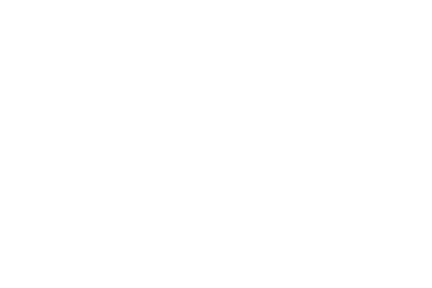

<IPython.core.display.Javascript object>


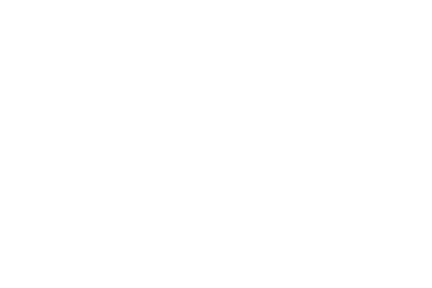

In [134]:
import matplotlib as mpl
print(mpl.__version__)
A = mpl.pyplot.plot(buffer[:,0]);

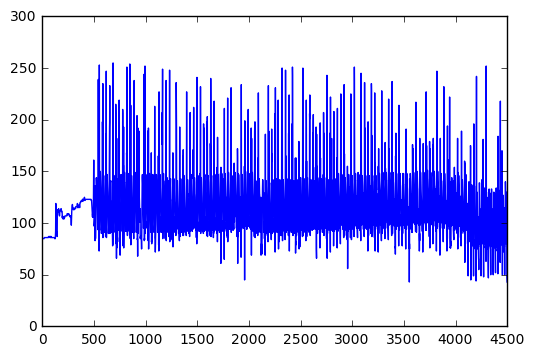

In [136]:
%matplotlib inline
plt.plot(pix[0:4500])

In [59]:
d = np.append(buffer, np.resize(a, [1,180,300]), axis=0)

In [61]:
d.shape

(11, 180, 300)